### Importing the libraries we need

In [1]:
%matplotlib inline 
import numpy as np
import scipy as misc
import matplotlib.pyplot as plt

### Creating a numpy array from satellite image

In [2]:
from skimage import data
import imageio
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg')
print(type(photo_data)) # return a numpy array as a subclass


<class 'imageio.core.util.Array'>


### Displaying the data in the image

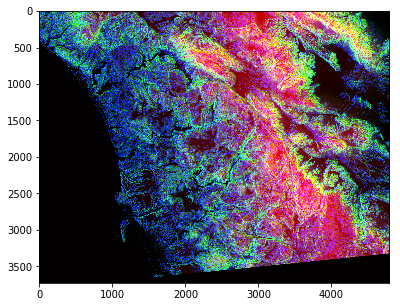

In [3]:
plt.figure(figsize=(10, 5)) #used to tweak the size of the image
plt.imshow(photo_data)

### Displaying the shape of the photo_data

In [4]:
print(photo_data.shape)
# The first two values are length and width, the third one is for three layers: Red, Green, Blue
# The RED pixel indicates Altitude
# The GREEN pixel indicates Slope
# The BLUE pixel indicates Aspect

(3725, 4797, 3)


### Displaying some features of the photo_data

In [5]:
#print the size
print(photo_data.size) # this return the product of thee dimensions of the shape of numpy array

53606475


In [6]:
#print the mean of 8-bit values of rgb values
print(np.mean(photo_data))

75.8299354508947


In [7]:
#print the min and max value of 8-bit rgb values
print(np.min(photo_data), np.max(photo_data))

0 255


### Pixel on 100th Row and 150th Column

In [8]:
photo_data[100, 150]

Array([ 32, 149,  79], dtype=uint8)

In [9]:
#printing the green intensity of this pixel
photo_data[100, 150, 1]

149

### Set a Pixel to all zeros, i.e. black colour 

In [10]:
photo_data[100, 150] = 0 #this will not be noticeable

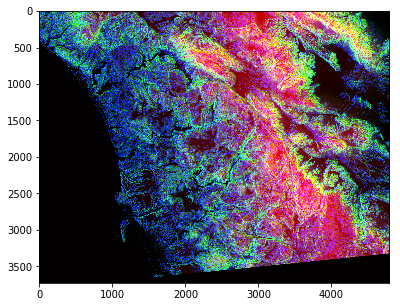

In [11]:
#plot the figure again
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

### Change a range of  pixels

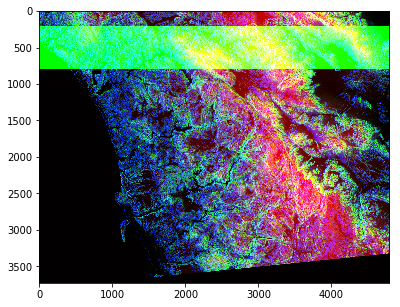

In [12]:
photo_data[200:800, :, 1] = 255 # avoid using loops where slicing is possible
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

### Pick all Pixels with Low Values

In [13]:
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg') # reload the image because we changed it

In [14]:
low_value_filter = photo_data < 200 # this returns a boolean ndarray of same shape
print("Shape of low value filter: ", low_value_filter.shape)
print("Data type of low value filter:", low_value_filter.dtype)
print("Shape of photo data and low value filter is same:", photo_data.shape == low_value_filter.shape)

Shape of low value filter:  (3725, 4797, 3)
Data type of low value filter: bool
Shape of photo data and low value filter is same: True


### Filtering out low values

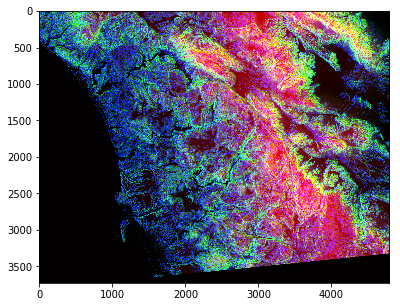

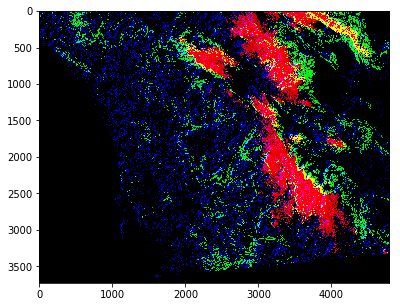

In [15]:
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)
photo_data[low_value_filter] = 0 # set low value pixel intensities to 0
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

### More Row and Column Operations


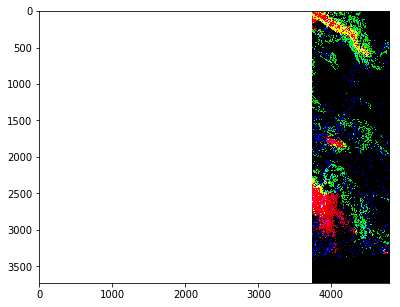

In [16]:
photo_data[0:len(photo_data), 0:len(photo_data), :] = 255
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

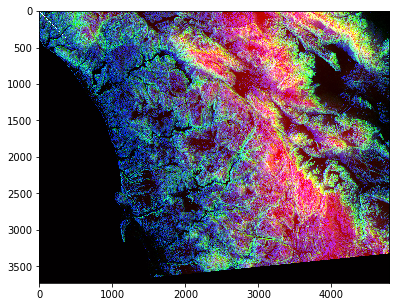

In [17]:
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg')
row_range = np.arange(len(photo_data))
col_range = np.arange(len(photo_data))
photo_data[row_range, col_range] = 255
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

#### Meshgrid, Ogrid, Mgrid functions

In [18]:
x = np.array([1, 2, 3])
y = np.array([10, 20, 30])
XX, YY = np.meshgrid(x, y)
print(XX)
print(YY)
xx2 = np.mgrid[1:4, 10:40:10];
print(XX + YY)

[[1 2 3]
 [1 2 3]
 [1 2 3]]
[[10 10 10]
 [20 20 20]
 [30 30 30]]
[[11 12 13]
 [21 22 23]
 [31 32 33]]


In [19]:
XX, YY = np.mgrid[1:4, 10:40:10]
print(XX)
print(YY)
print(XX + YY)

[[1 1 1]
 [2 2 2]
 [3 3 3]]
[[10 20 30]
 [10 20 30]
 [10 20 30]]
[[11 21 31]
 [12 22 32]
 [13 23 33]]


In [20]:
XX, YY = np.ogrid[1:4, 10:40:10]
print(XX)
print(YY)
print(XX + YY)

[[1]
 [2]
 [3]]
[[10 20 30]]
[[11 21 31]
 [12 22 32]
 [13 23 33]]


### Masking Images

In [21]:
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg')
total_rows, total_cols, total_layers = photo_data.shape

In [22]:
print(total_rows, total_cols, total_layers)

3725 4797 3


In [23]:
centre_row = total_rows / 2
centre_col = total_cols / 2
print(centre_row, centre_col)

1862.5 2398.5


In [24]:
# calculating distance from the centre
XX, YY = np.ogrid[:total_rows, :total_cols]
distX = (XX - centre_row) ** 2
distY = (YY - centre_col) ** 2
dist = distX + distY

In [25]:
radius = (total_rows / 2) ** 2
print(radius)

3468906.25


In [26]:
circular_filter = dist > radius

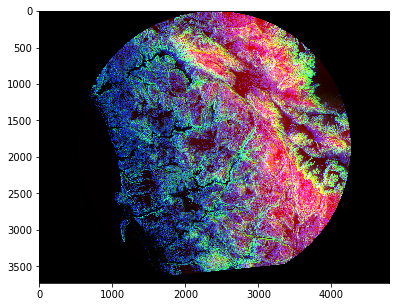

In [27]:
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg')
photo_data[circular_filter] = 0
plt.figure(figsize=(10, 5))
plt.imshow(photo_data)

### Further Masking

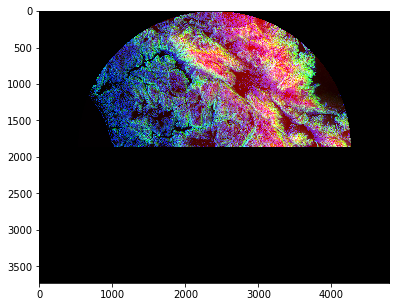

In [28]:
upper_half_filter = (dist > radius) | (XX > (total_rows / 2))
photo_data[upper_half_filter] = 0
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

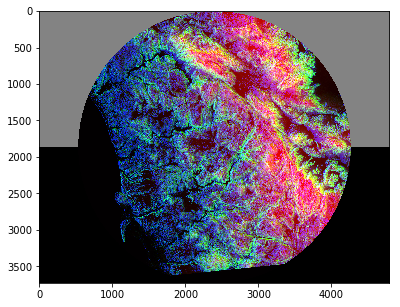

In [29]:
import random
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg')
upper_half_mask = (dist > radius) & (XX < centre_row)
photo_data[circular_filter] = 0
photo_data[upper_half_mask] = random.randint(100, 210)
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

### Processing of Red Pixels

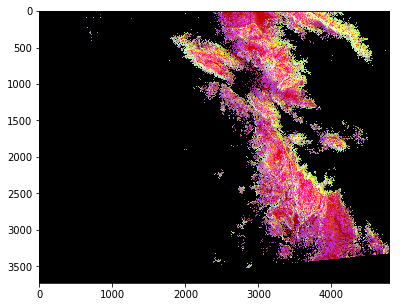

In [30]:
#highlight high altitude areas i.e. RED pixels with high intensity
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg')
red_mask = photo_data[:, :, 0] < 150
photo_data[red_mask] = 0
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

### Processing of Green Pixels

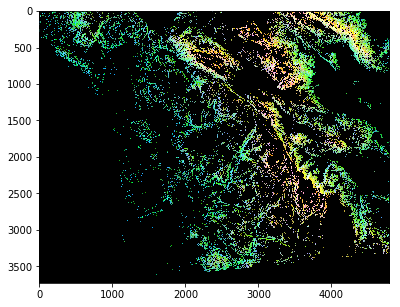

In [31]:
#highlight high Slope areas i.e. GREEN pixels with high intensity
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg')
green_mask = photo_data[:, :, 1] < 150
photo_data[green_mask] = 0
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

### Processing of Blue Pixels

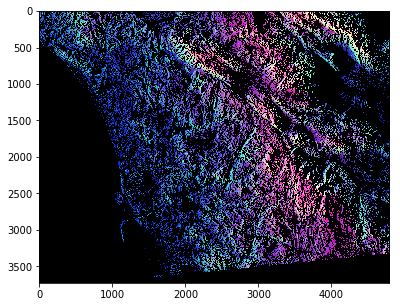

In [32]:
#highlight high Aspect areas i.e. BLUE pixels with high intensity
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg')
blue_mask = photo_data[:, :, 2] < 150
photo_data[blue_mask] = 0
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)

### Composite Mask that takes threshold on all three layers : Red, Green, Blue

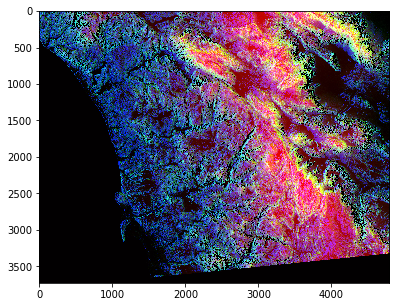

In [33]:
# create a mask that filters pixels with high altitude, high aspect and low slope
photo_data = imageio.imread('.\Week-3-Numpy\wifire\sd-3layers.jpg')
composite_mask = (red_mask & ~green_mask) & (blue_mask)
photo_data[composite_mask] = 0
plt.figure(figsize = (10, 5))
plt.imshow(photo_data)